In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
import math
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import os

In [2]:
import cv2

In [3]:
cat_path = "datasett-hundogkatt/training_set/training_set/cats/"
dog_path = "datasett-hundogkatt/training_set/training_set/dogs/"

In [4]:
cat_img = []
for i in os.listdir(cat_path):
    if i.endswith(".jpg"):
        temp_img = cv2.imread(os.path.join(cat_path, i), cv2.IMREAD_GRAYSCALE)
        temp_img = cv2.resize(temp_img, (64,64), interpolation= cv2.INTER_LINEAR )
        cat_img.append(temp_img)

In [5]:
cat_img = np.asarray(cat_img)
#cat_img = np.expand_dims(cat_img,-1)

In [6]:
y_cat = np.zeros(cat_img.shape[0])

In [7]:
dog_img = []
for i in os.listdir(dog_path):
    if i.endswith(".jpg"):
        temp_img = cv2.imread(os.path.join(dog_path, i), cv2.IMREAD_GRAYSCALE)
        temp_img = cv2.resize(temp_img, (64,64), interpolation= cv2.INTER_LINEAR )
        dog_img.append(temp_img)


In [8]:
dog_img = np.asarray(dog_img)
#dog_img = np.expand_dims(dog_img,-1)

In [9]:
y_dog = np.ones(dog_img.shape[0])

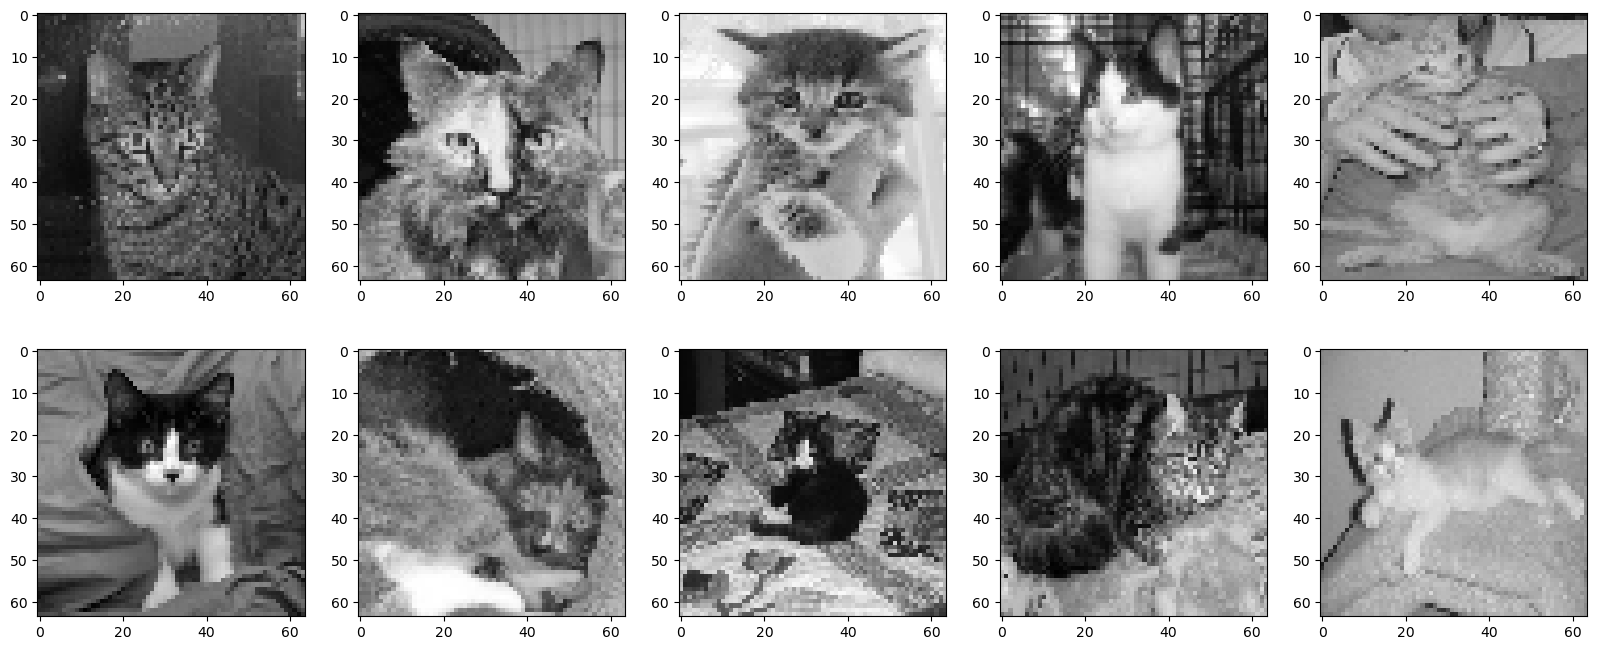

In [10]:
plt.figure(figsize=(20,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(cat_img[i],cmap='gray', vmin=0, vmax=255)

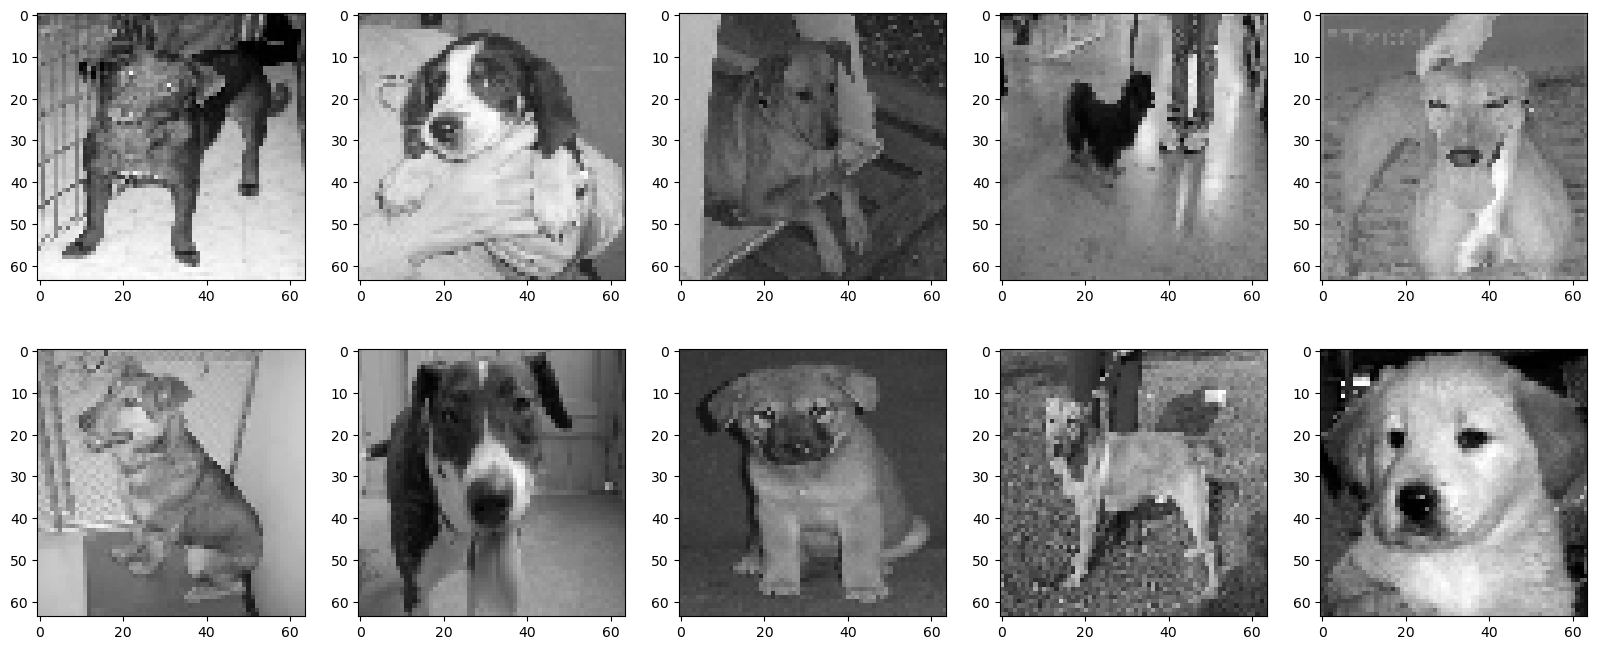

In [11]:
plt.figure(figsize=(20,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(dog_img[i],cmap='gray', vmin=0, vmax=255)

In [12]:
X = np.vstack([cat_img,dog_img])

In [13]:
y = np.hstack([y_cat,y_dog])

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

In [15]:
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([3187, 3217], dtype=int64))

In [16]:
np.unique(y_val, return_counts=True)

(array([0., 1.]), array([813, 788], dtype=int64))

In [17]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])

In [18]:
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1]*X_val.shape[2])

In [19]:
def dnn(n_features, n_output):
    input_lag = tf.keras.layers.Input(shape=(n_features))
    skjult_lag = tf.keras.layers.Dense(n_features*2, activation='relu')(input_lag)
    output_lag = tf.keras.layers.Dense(n_output, activation='softmax')(skjult_lag)
    modell = tf.keras.models.Model(inputs=input_lag, outputs=output_lag)
    return modell

In [20]:
y_train = np.expand_dims(y_train ,-1)

In [21]:
model = dnn(X_train.shape[1],y_train.shape[1])

In [22]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                metrics = [tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.AUC(curve='ROC')])

In [23]:
history = model.fit(x=X_train,y=y_train, epochs=25, batch_size=64, validation_data=(X_val,y_val), shuffle=True)

Epoch 1/25
101/101 [==============================] - 39s 359ms/step - loss: 102.2435 - binary_accuracy: 0.5023 - auc: 0.5000 - val_loss: 8.6146 - val_binary_accuracy: 0.4922 - val_auc: 0.5000
Epoch 2/25
101/101 [==============================] - 31s 305ms/step - loss: 18.4114 - binary_accuracy: 0.5023 - auc: 0.5000 - val_loss: 14.1528 - val_binary_accuracy: 0.4922 - val_auc: 0.5000
Epoch 3/25
101/101 [==============================] - 37s 367ms/step - loss: 19.2824 - binary_accuracy: 0.5023 - auc: 0.5000 - val_loss: 22.7005 - val_binary_accuracy: 0.4922 - val_auc: 0.5000
Epoch 4/25
101/101 [==============================] - 38s 378ms/step - loss: 10.9999 - binary_accuracy: 0.5023 - auc: 0.5000 - val_loss: 21.5769 - val_binary_accuracy: 0.4922 - val_auc: 0.5000
Epoch 5/25
101/101 [==============================] - 33s 331ms/step - loss: 12.7490 - binary_accuracy: 0.5023 - auc: 0.5000 - val_loss: 8.1893 - val_binary_accuracy: 0.4922 - val_auc: 0.5000
Epoch 6/25
101/101 [================

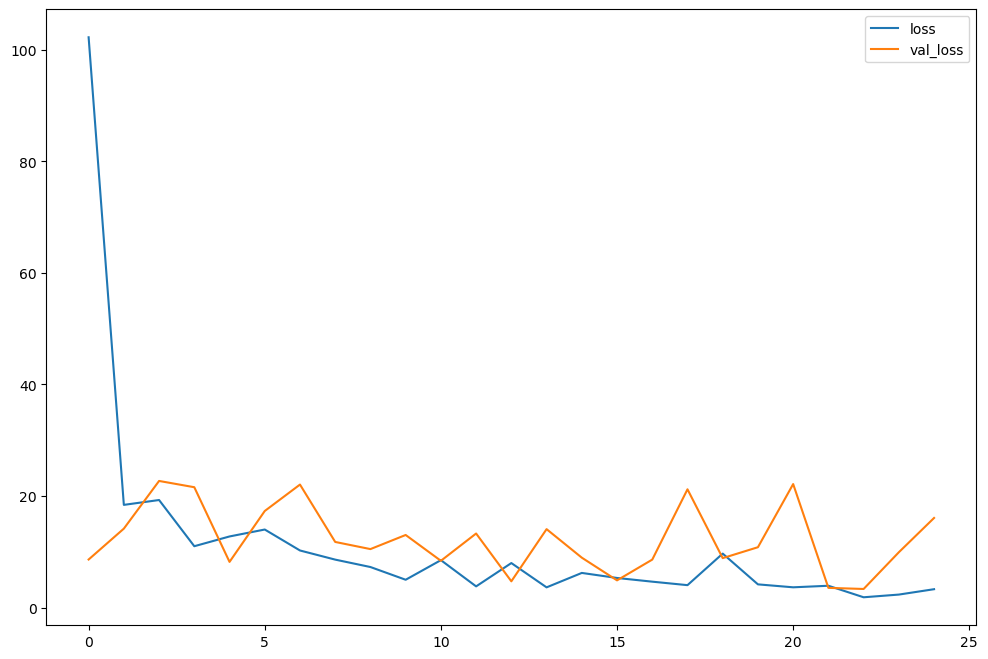

In [24]:
plt.figure(figsize=(12,8))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

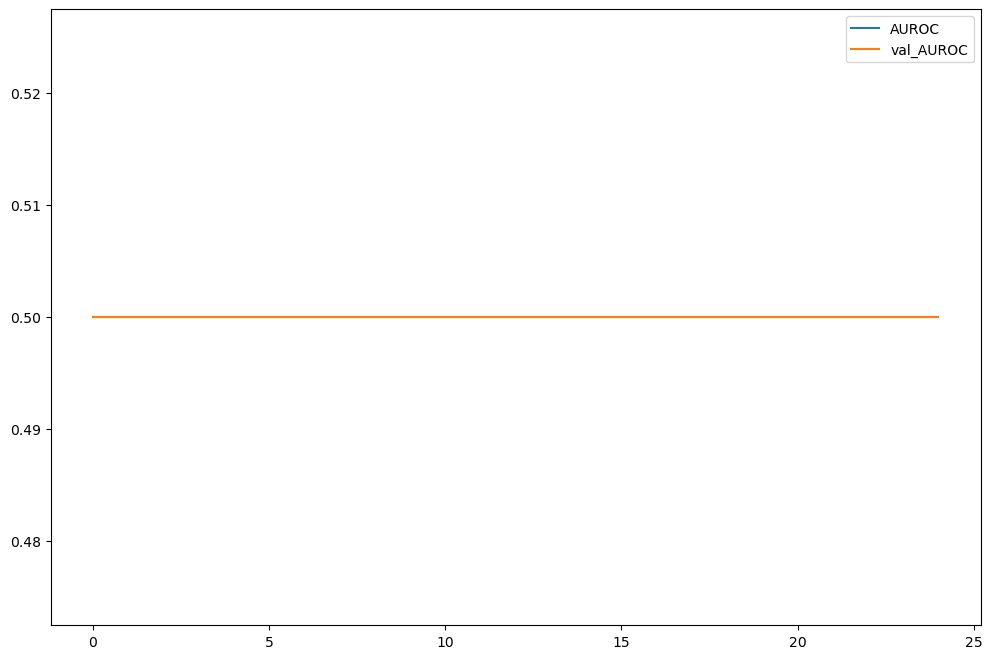

In [25]:
plt.figure(figsize=(12,8))
plt.plot(history.history[list(history.history.keys())[2]], label="AUROC")
plt.plot(history.history[list(history.history.keys())[5]], label="val_AUROC")
plt.legend()